# MULTICLASS CLASSIFICATION 



In [22]:
#importing libraries
#__Nothing_to_change_here__

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [23]:
#importing the dataset
(X_train,Y_train),(X_test,Y_test) = tf.keras.datasets.fashion_mnist.load_data()
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_test,Y_test,test_size=0.2)

In [24]:
# Print shape of all 4 variables: X_train,Y_train,X_test, and Y_test
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(8000, 28, 28)
(2000, 28, 28)
(8000,)
(2000,)


In [25]:
#print the unique values in Y_train
print(np.unique(Y_train))

[0 1 2 3 4 5 6 7 8 9]


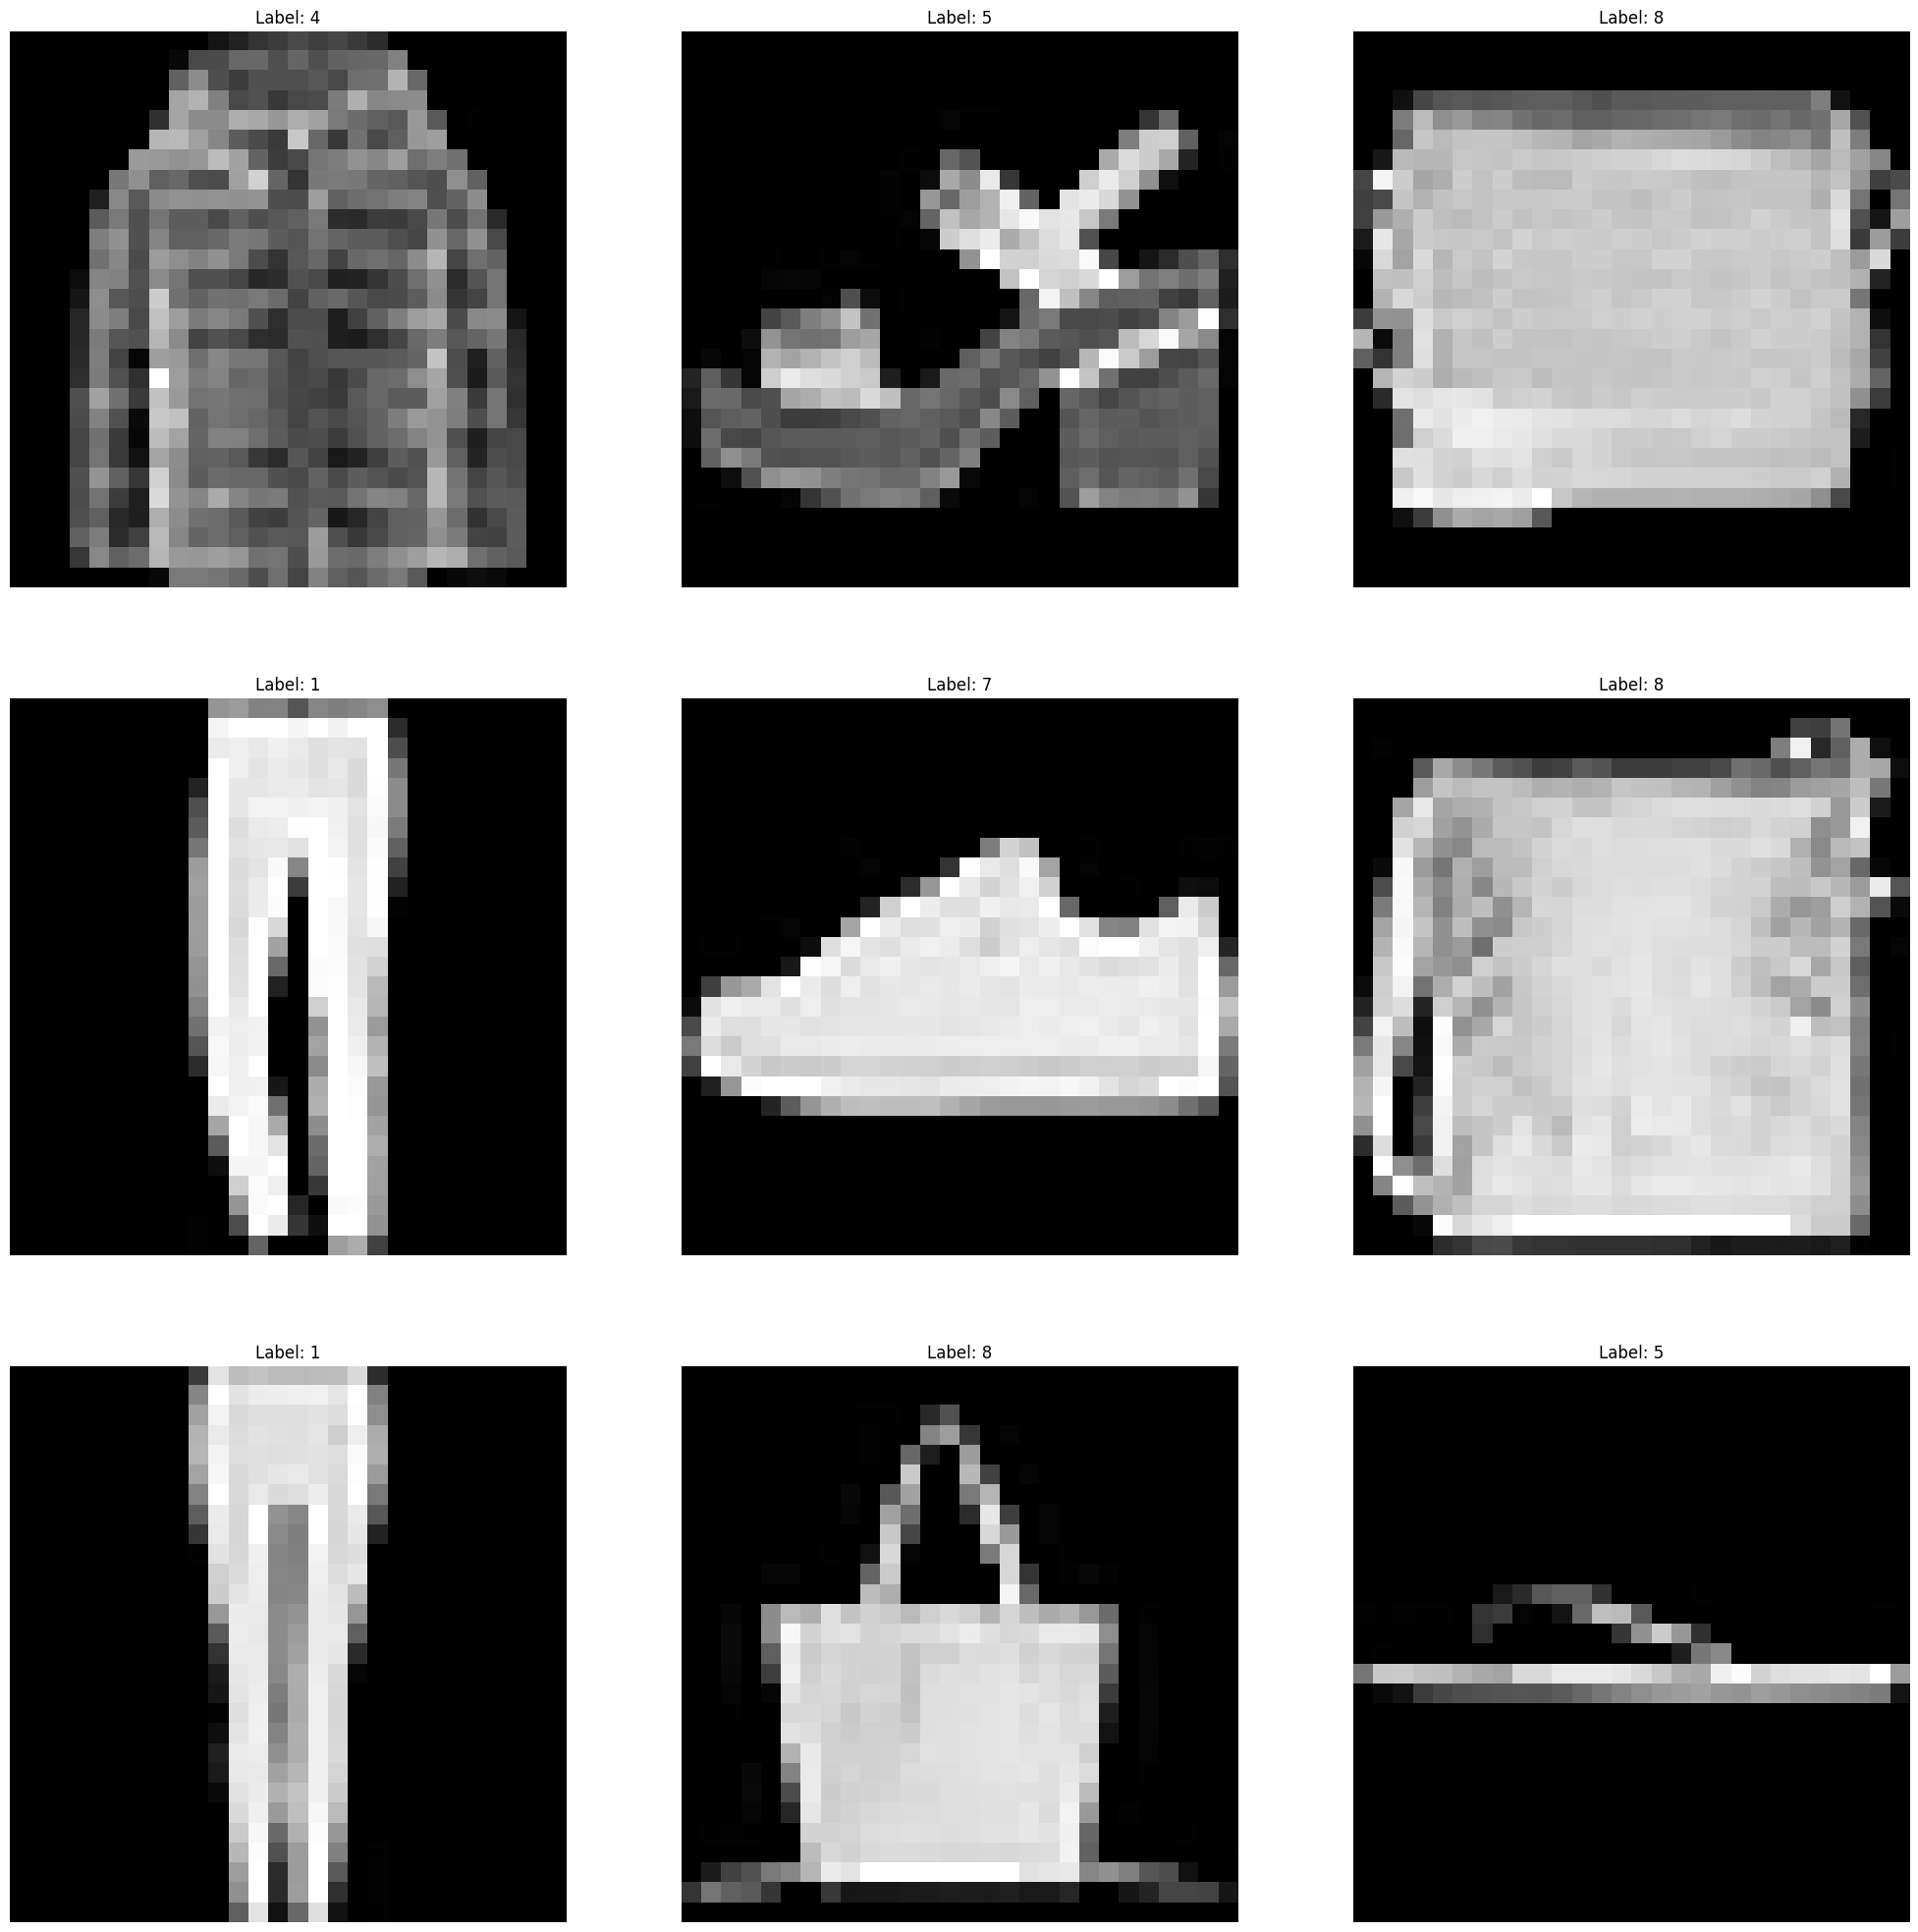

In [26]:
#randomly print 9 images with label
#edit the 2 lines of the code snippet

import random
figure = plt.figure(figsize=(25,25))
for i in range(9):
  index = random.randint(0,len(X_train)-1) # showing the index_th image
  plt.subplot(3,3,i+1)

  #edit1__plot_image_here_
  plt.imshow(X_train[index], cmap='gray')
  plt.axis('off')

  #edit2__add_label_here_
  plt.title('Label: {}'.format(Y_train[index]))


###These number denotes the respective object
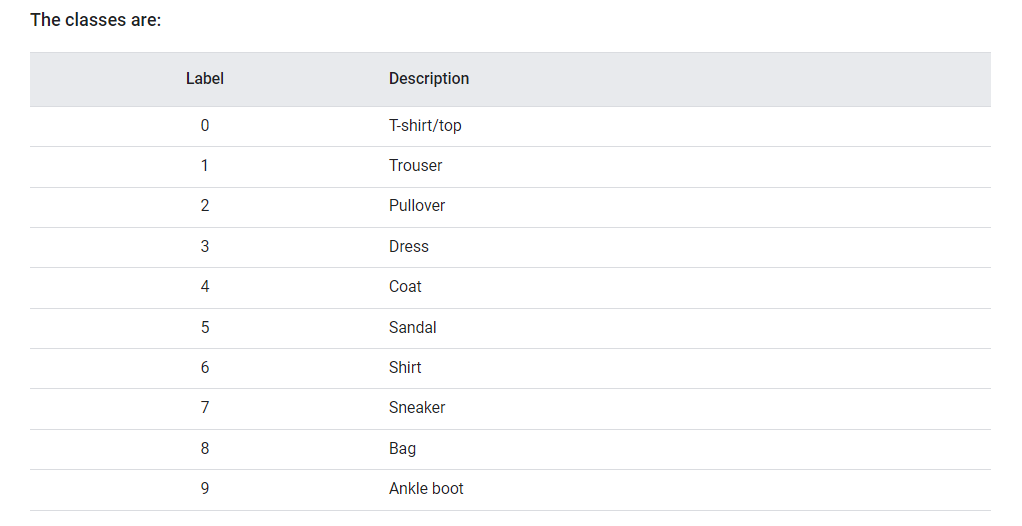

In [27]:
# Find the count of each type of class
for label in np.unique(Y_train):
    count = np.sum(Y_train == label)
    print(f"Class {label}: {count} data values")

Class 0: 801 data values
Class 1: 776 data values
Class 2: 815 data values
Class 3: 808 data values
Class 4: 798 data values
Class 5: 803 data values
Class 6: 796 data values
Class 7: 807 data values
Class 8: 787 data values
Class 9: 809 data values


In [28]:
# model initialization
model = tf.keras.Sequential()

# adding the 1st and 2nd layer layer 
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))


#__add__ additional Intermediate Dense layers here to create the output
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))

#__output__layer with correct output shape and activation function[ google if finding this difficult to get]
model.add(tf.keras.layers.Dense(10, activation='softmax'))

c:\Users\kkart\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [29]:
# Compiling the model
#add the lr and loss in the given space

model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001),
                  loss = 'sparse_categorical_crossentropy'
                  ,metrics=['accuracy'])

In [30]:
#Lets analyse the model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 150,602 (588.29 KB)

 Trainable params: 150,602 (588.29 KB)

 Non-trainable params: 0 (0.00 B)

###What is the number of trainable parameters in the model?

In [31]:
""" 
[objective] Write the answer here:  150,602
"""

' \n[objective] Write the answer here:  150,602\n'

In [32]:
#lets train the model
#pass correct argument at the comment's place

history = model.fit(X_train, Y_train, epochs=10, validation_split=0.2)

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4572 - loss: 23.9239 - val_accuracy: 0.6500 - val_loss: 1.0359
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6693 - loss: 0.9112 - val_accuracy: 0.6375 - val_loss: 1.0364
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7080 - loss: 0.7773 - val_accuracy: 0.6956 - val_loss: 0.8930
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7371 - loss: 0.6987 - val_accuracy: 0.7056 - val_loss: 0.8522
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7550 - loss: 0.6512 - val_accuracy: 0.7312 - val_loss: 0.8401
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7902 - loss: 0.5778 - val_accuracy: 0.7356 - val_loss: 0.8048
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7916 - loss: 0.5474 - val_accuracy: 0.7412 - val_loss: 0.7860
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8007 - loss: 0.5222 - val_accuracy: 0

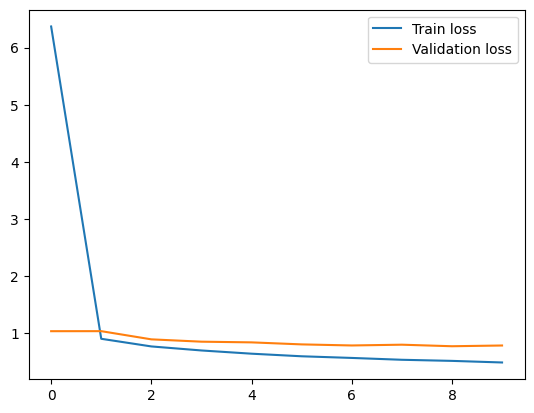

In [33]:
#lets plot the losses

plt.plot(history.history['loss'],label="Train loss")
plt.plot(history.history['val_loss'], label = "Validation loss")
plt.legend()

###What do you infer from the graph of losses above?

In [34]:
"""
[Under 100 words] Write your answer here:

1. Train Loss : It is the error of the model on the training data during each epoch. Here, the decreasing trend of the this loss over the epochs is a positive 
sign as it indicates that the model is learning and improving the predictions.

2. Validation Loss : It is the error of the model on the testing data during each epoch. As it is a loss variable, obviously, decreaing trend of this loss at 
the beginning would have been ideal but leveling off means that model is able to generalise well. It is good that the loss isn't increasing as that could imply 
overfitting of data.

3. Conclusion : The graph doesn't imply ovdrfitting as there is not much gap between both the losses and it neither suggests underfitting as the values of both
losses doesn't seem to be high. Training loss indicates how well the model is fitting the training data and Validation loss indicates how well the model is 
generalising the testing data. From the graph, it looks like the fitting is optimum and the model is responding well.

"""

"\n[Under 100 words] Write your answer here:\n\n1. Train Loss : It is the error of the model on the training data during each epoch. Here, the decreasing trend of the this loss over the epochs is a positive \nsign as it indicates that the model is learning and improving the predictions.\n\n2. Validation Loss : It is the error of the model on the testing data during each epoch. As it is a loss variable, obviously, decreaing trend of this loss at \nthe beginning would have been ideal but leveling off means that model is able to generalise well. It is good that the loss isn't increasing as that could imply \noverfitting of data.\n\n3. Conclusion : The graph doesn't imply ovdrfitting as there is not much gap between both the losses and it neither suggests underfitting as the values of both\nlosses doesn't seem to be high. Training loss indicates how well the model is fitting the training data and Validation loss indicates how well the model is \ngeneralising the testing data. From the grap

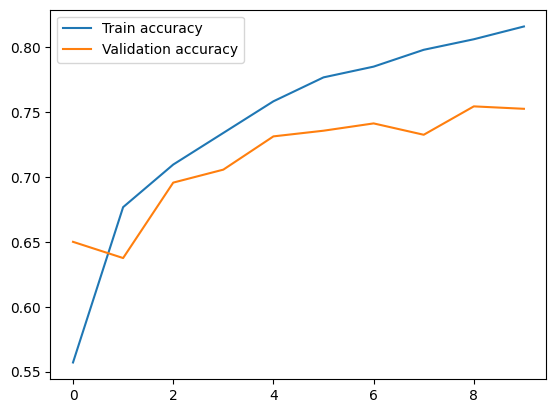

In [35]:
#plotting the accuracy of the traing

plt.plot(history.history['accuracy'],label="Train accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation accuracy")
plt.legend()

###What do you infer from the graph of accuracies above?

In [36]:
"""
[Under 100 words] Write your answer here:

1. Train accuracy : It is the percentage of correctly predicted labels on the training data during each epoch. Obviously, an increasing trend is a great sign 
as it implies that the model is improving its ability to classify the training samples correctly.

2. Validation accuracy : It is the percentage of correctly predicted labels on the testing data during each epoch.Even here, increase seems to be a positive sign.
fluctuations are reasonable but if it were to decrease, that might imply overfitting.

3. Conclusion : The graph doesnt imply overfitting as there is no big difference between the accuracies and it neither suggests underfitting as the value isn't 
too low. Conclusively, even this graph suggests that model is learning well (optimum fitting) and responding well (good generalisation).

"""

"\n[Under 100 words] Write your answer here:\n\n1. Train accuracy : It is the percentage of correctly predicted labels on the training data during each epoch. Obviously, an increasing trend is a great sign \nas it implies that the model is improving its ability to classify the training samples correctly.\n\n2. Validation accuracy : It is the percentage of correctly predicted labels on the testing data during each epoch.Even here, increase seems to be a positive sign.\nfluctuations are reasonable but if it were to decrease, that might imply overfitting.\n\n3. Conclusion : The graph doesnt imply overfitting as there is no big difference between the accuracies and it neither suggests underfitting as the value isn't \ntoo low. Conclusively, even this graph suggests that model is learning well (optimum fitting) and responding well (good generalisation).\n\n"

In [37]:
#Checking the prediction

Y_predicted = model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [38]:
# Calculate the R2score for the test data
from sklearn.metrics import r2_score
R2score = r2_score(Y_test, np.argmax(Y_predicted, axis=1))
print(R2score)

0.6762679957727527


In [39]:
from sklearn.metrics import classification_report, accuracy_score, f1_score

# Assuming Y_predicted is the raw output of your model
Y_pred_classes = np.argmax(Y_predicted, axis=1)

# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred_classes)
print(f"Accuracy: {accuracy}")

# Calculate F1 score (micro-averaged for multi-class)
f1 = f1_score(Y_test, Y_pred_classes, average='micro')
print(f"F1 Score (micro): {f1}")

# Get a detailed classification report
report = classification_report(Y_test, Y_pred_classes)
print("Classification Report:")
print(report)

Accuracy: 0.7635
F1 Score (micro): 0.7635
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.79      0.77       199
           1       0.95      0.94      0.95       224
           2       0.55      0.71      0.62       185
           3       0.77      0.82      0.79       192
           4       0.52      0.68      0.59       202
           5       0.86      0.87      0.87       197
           6       0.51      0.17      0.26       204
           7       0.87      0.85      0.86       193
           8       0.87      0.89      0.88       213
           9       0.91      0.91      0.91       191

    accuracy                           0.76      2000
   macro avg       0.76      0.76      0.75      2000
weighted avg       0.76      0.76      0.75      2000



In [40]:
# Let's see the kernel(weights) of the layers
print(model.layers[1].kernel.shape)

(784, 128)


In [41]:
# print the shape of kernel of other layers as well
print(model.layers[2].kernel.shape)
print(model.layers[3].kernel.shape)
print(model.layers[4].kernel.shape)

(128, 256)
(256, 64)
(64, 10)


In [42]:
# Does that satisfied the matrix multiplication math discussed earlier

YES!

after flattening, the dim of input layer is (784,), i.e, 1x784 matrix. When multiplied with a kernal of shape 784x128 it will result into next dense layer of size 1x128 which is (128,) and similarly the rest.